# Capstone Project: Marketing & Retail Analytics

## 1. Exploratory Data analysis

In [3]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1 Examining the Orders Sheet

In [5]:
# Loading the order data
orders_df = pd.read_excel(r"C:\Users\Compu\Downloads\Retail_dataset.xlsx", sheet_name="orders")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [6]:
# Finding shape of orders_df
orders_df.shape

(99441, 7)

In [7]:
# Examining column info
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_timestamp      96476 non-null  datetime64[ns]
 6   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 5.3+ MB


In [8]:
# Examining for duplicated order_id
orders_df.order_id.duplicated().sum()

0

In [9]:
# Examining for duplicated customer_id
orders_df.customer_id.duplicated().sum()

3345

#### Note: This is expected as single customer can place many order

In [11]:
# Examining order_status column
orders_df.order_status.value_counts(normalize=True)*100

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64

In [12]:
# keeping delivered orders details in the order_df
orders_df = orders_df[orders_df.order_status == 'delivered']
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [13]:
# Finding Shape
orders_df.shape

(96478, 7)

In [14]:
# Examining order_status column
orders_df.order_status.value_counts(normalize=True)*100

order_status
delivered    100.0
Name: proportion, dtype: float64

#### Now, only deliveried orders information is present in the data frame

In [16]:
# Examining the missing value
orders_df.isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

#### Note: Here we can see that 'order_approved_at' and 'order_delivered_timestamp' column have missing values.


###### There can be 2 ways to treat the missing values
   - by simply removing the rows as number of missing values are very less.
   - by imputing some value: we can assume that the order_approved time and order_delivered timestamp can be same as with order purchase timestamp as well as delivery date.
   
   We already have filtered the data on delivery status, it would be better to treat the missing value by imputing some value

In [19]:
# Replacing the missing values
orders_df.order_approved_at.fillna(orders_df.order_purchase_timestamp, inplace = True)

orders_df.order_delivered_timestamp.fillna(orders_df.order_estimated_delivery_date, inplace = True)

In [20]:
# Examining for missing values again
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

### 1.2   Examining order_item sheet

In [22]:
# Loading order_items sheet
order_items_df = pd.read_excel(r"C:\Users\Compu\Downloads\Retail_dataset.xlsx", sheet_name="order_items")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [23]:
# Examining shape
order_items_df.shape

(112650, 6)

In [24]:
# Examining column info
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [25]:
# Examining the duplicates
order_items_df[['order_id', 'order_item_id']].duplicated().sum()

0

In [26]:
# Examining missing values
order_items_df.isna().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

#### Note: In Order_items sheet there is no missing values.

### 1.3 Checking Customers sheet

In [29]:
# Loading customers sheet
customers_df = pd.read_excel(r"C:\Users\Compu\Downloads\Retail_dataset.xlsx", sheet_name="customers")
customers_df.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [30]:
# Examining the shape
customers_df.shape

(99441, 4)

In [31]:
# Examining column info
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_zip_code_prefix  99441 non-null  int64 
 2   customer_city             99441 non-null  object
 3   customer_state            99441 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


In [32]:
# Examining the duplicates
customers_df.customer_id.duplicated().sum()

3345

#### Note: Here, we have 3345 rows with duplicate data. For keeping all the unique values, first occurance of the such value need to be kept in dataset.

In [34]:
# droping duplicate values in customer_id column
customers_df.drop_duplicates(subset="customer_id", keep='first', inplace=True)

In [35]:
# Examining the shape again
customers_df.shape

(96096, 4)

In [36]:
# Examining duplicate again
customers_df.customer_id.duplicated().sum()

0

In [37]:
# Examining the missing values
customers_df.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### Note: In customers data, we get rid on duplicate and missing values. Now there is no missing and duplicate values.

### 1.4 Checking Payments data

In [40]:
# Loading payments sheet
payments_df = pd.read_excel(r"C:\Users\Compu\Downloads\Retail_dataset.xlsx", sheet_name="payments")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [41]:
# Examining shape of dataset
payments_df.shape

(103886, 5)

In [42]:
# Examining column info
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [43]:
# Examining the duplicates
payments_df[['order_id', 'payment_sequential']].duplicated().sum()

0

In [44]:
# Examining the missing values
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

#### Note: In payments data there is no duplicate and missing values.

### 1.5 Checking products data

In [47]:
# Loading products sheet
products_df = pd.read_excel(r"C:\Users\Compu\Downloads\Retail_dataset.xlsx", sheet_name="products")
products_df.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [48]:
# Examining the sahpe of data
products_df.shape

(32951, 6)

In [49]:
# Examining the column info
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [50]:
# Examining the duplicate values
products_df.product_id.duplicated().sum()

0

In [51]:
# Examining the missing values
products_df.isna().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

#### Note: We have missing values in "product_category_name", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"

In [53]:
# evaluating product_category_name column
products_df.product_category_name.value_counts(normalize=True)*100

product_category_name
toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
fashion_childrens_clothes             0.003051
diapers_and_hygiene                   0.003051
home_comfort_2                        0.003051
security_and_services                 0.003051
furniture_mattress_and_upholstery     0.003051
Name: proportion, Length: 70, dtype: float64

#### Note: In the product_category_name column around 75% data contains toys. So, the missing value can be imputed as toys. 

In [55]:
# replacing the missing values with toys
products_df.product_category_name.fillna(products_df.product_category_name.mode()[0], inplace=True)

In [56]:
# Again axamining the missing value
products_df.isna().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [57]:
# evaluating product weight, length, height, width columns
products_df.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


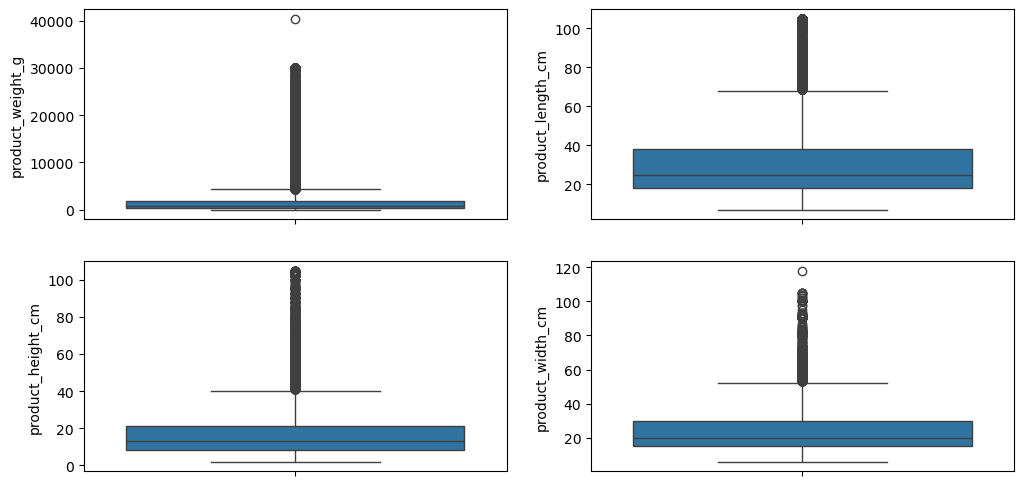

In [58]:
# Examine the distribution

plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.boxplot(y= products_df.product_weight_g)

plt.subplot(2,2,2)
sns.boxplot(y= products_df.product_length_cm)

plt.subplot(2,2,3)
sns.boxplot(y= products_df.product_height_cm)

plt.subplot(2,2,4)
sns.boxplot(y= products_df.product_width_cm)


plt.show()

#### Note: We can see that there is no outliers present in the columns, due to difference in the mean and median values in respective columns we can impute the missing values with median.

In [60]:
# imputing the missing values of numberic columns with respective median values.
cols = products_df.describe().columns.to_list()
cols

['product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [61]:
for i in cols:
    products_df[i].fillna(products_df[i].median(), inplace=True)

In [62]:
# Again examining the missing values
products_df.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

### Here, we have checked and cleaned all the excel sheet with missing and duplicated values.

## 2. Exporting the data into new excel

In [65]:
# Creating the Pandas Excel
writer = pd.ExcelWriter('Retail_Dataset_Cleaned.xlsx', engine='xlsxwriter')

In [66]:
# write each dataframes into different excel sheets
orders_df.to_excel(writer, sheet_name='Orders', index = False)
order_items_df.to_excel(writer, sheet_name='Order_items', index = False)
customers_df.to_excel(writer, sheet_name='Customers', index = False)
payments_df.to_excel(writer, sheet_name='Payments', index = False)
products_df.to_excel(writer, sheet_name='Products', index = False)

In [67]:
# Closing the Pandas Excel writer
writer.close()

In [68]:
# Checking whether export was successful?
import os
os.getcwd()

'C:\\Users\\Compu'

#### Note: We can use the cleaned excel workbook for buiding necessay visulasations and dashboards on Tableau.

## 3. Market Basket Analysis

Market basket analysis would help in identifying the two products association strength by doing this we can understand which combination of products purchased frequently.

For market basket analysis we going to you cleaned data set

In [72]:
# Loading order_items data
data1 = pd.read_excel(r"C:\Users\Compu\Retail_Dataset_Cleaned.xlsx", sheet_name="Order_items")
data1.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [73]:
# Examining shape of data1
data1.shape

(112650, 6)

In [74]:
# Loading products data
data2 = pd.read_excel(r"C:\Users\Compu\Retail_Dataset_Cleaned.xlsx", sheet_name="Products")
data2.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,baby,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,housewares,625,20,17,13


In [75]:
#Examining shape of data2
data2.shape

(32951, 6)

In [76]:
# Merging both data1 and data2
fin_data = pd.merge(data1, data2, on = 'product_id', how = 'inner', indicator = True)
fin_data.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,toys,650,28,9,14,both
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,toys,30000,50,30,40,both
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,toys,3050,33,13,33,both
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,toys,200,16,10,15,both
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,toys,3750,35,40,30,both


In [77]:
# Examining shape of fin_data
fin_data.shape

(112650, 12)

In [78]:
# For market basket analysis we only required product_category_name and order_id.
# Filtering out the required column
fin_data = fin_data[['order_id', 'product_category_name']]
fin_data.head()

,order_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,toys
1,00018f77f2f0320c557190d7a144bdd3,toys
2,000229ec398224ef6ca0657da4fc703e,toys
3,00024acbcdf0a6daa1e931b038114c75,toys
4,00042b26cf59d7ce69dfabb4e55b4fd9,toys


In [79]:
# Examining shape
fin_data.shape

(112650, 2)

In [80]:
# Creating Pandas excel writer
writer = pd.ExcelWriter('Market_basket_analysis.xlsx', engine='xlsxwriter')

In [81]:
# we are writing the dataframe to two different worksheets as we will create self-join in Tableau.
fin_data.to_excel(writer, sheet_name='Product_Cat_1', index = False)
fin_data.to_excel(writer, sheet_name='Product_Cat_2', index = False)

In [82]:
# Closing the Pandas Excel writer
writer.close()

In [83]:
# checking the exported file
import os
os.getcwd()

'C:\\Users\\Compu'

#### Now, we can use this excel workbooks for doing market basket analysis in Tableau